### DSCI 100 Final Report Group Project

Members: Ewan Maclachlan, Islam Soliman, Sun Lo, Vicky Tan

Group: 004-27

TA: Jordan Yu

In [1]:
library(tidyverse)
library(lubridate)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### Part 1: Introduction

#### Background Information
This report explores the relations between the attributes of Minecraft players and their expertise level in the game. The raw datasets `players_data` and `sessions_data` will be used in the analysis. The data was collected by Pacific Laboratory of Artificial Intelligence (PLAI), a research group in Computer Science at the University of British Columbia led by Frank Wood.

#### Question of Interest
- Can `average_session_length` and `Age` predict the `experience` of the Minecraft player?

#### Data Description of `players_data`
- details the identity of players and was collected through the recording of players' actions in Minecraft servers
- 196 observations (NA values included)
- 7 variables

##### Name of Variables and Types
- `experience` is character type, meaning it represents text values
- `subscribe` is logical type, meaning it contains boolean values, TRUE or FALSE, for each corresponding observation
- `hashedEmail` is character type, meaning it stores text values
- `played_hours` is double(numeric) type, meaning it records decimal numbers
- `name` is character type, meaning it displays text values
- `gender` is character type, meaning it shows text values
- `Age` is double(numeric) type, meaning it shows numbers and in this case integers

##### Variable Description
- `experience` is the level of expertise
- `subscribe` is whether or not the player has a subscription
- `hashedEmail` is their email identifier
- `played_hours` is the number of hours spent on the game
- `name` is the player's name
- `gender` is the player's gender
- `Age` is the player's age in years

#### Data Description of `sessions_data`
- records the exact start and end times, including dates, of each player's Minecraft gaming session formatted in DD/MM/YYYY HH/MM and UNIX time
- 1535 observations
- 5 variables

##### Name of Variables and Types
- `hashedEmail` is character type, meaning it stores text values
- `start_time` and `end_time` are character types, meaning they contain text values
  - however, they can be converted into POSIXct, a date-time class in R
- `original_start_time` and `original_end_time` are double (numeric type), meaning numerals that represent the milliseconds

##### Variable Description
- `hashedEmail` is their email identifier
- `start_time` is the time when the player started gaming, down to the exact minute of the date
- `end_time` is the time when the player stopped gaming, down to the exact minute of the date
- `original_start_time` is the game's start in UNIX format
- `original_end_time` is the game's end in UNIX format

### Part 2: Methods & Results

The datasets, `players_data` and `sessions_data`, have been loaded into R below and any NA values have been removed. K-Nearest Neighbors (KNN) classification will be used to predict the target categorical variable, `experience`, with two known numerical predictors, `Age` and `average_session_length`. Therefore, the following reports the loaded dataframes, data wrangling process, brief summary statistics, exploratory data analysis, KNN classification model creation, and calculated evaluation of the data analysis.

#### Loading `players_data` into R

In [2]:
url_players <- "https://raw.githubusercontent.com/vckytn22/DSCI-100-Final-Report-Group-Project-004-27-/refs/heads/main/players.csv"
players_data <- read_csv(url_players) |> drop_na()
head(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


#### Loading `sessions_data` into R

In [3]:
url_sessions <- "https://raw.githubusercontent.com/vckytn22/DSCI-100-Final-Report-Group-Project-004-27-/refs/heads/main/sessions.csv"
sessions_data <- read_csv(url_sessions) |> drop_na()
head(sessions_data)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


#### Data Wrangling
##### New Variable `average_session_length`

The raw dataset `sessions_data` was wrangled to produce the new variable `average_session_length`. The variable `average_session_length` is a double type that represents the average duration of a player's gaming sessions. Firstly, `session_length` was calculated by taking the absolute difference of `start_time` and `end_time`. It represents the duration of each recorded gaming session in minutes. However,`session_length` cannot be directly used in KNN classification because it records
each gaming session as a new observation; therefore, the same player information appears multiple times in the dataframe. KNN classification would process the same player as multiple different ones; thus, predictions would be biased towards players with more gaming sessions. To counteract this, the average gaming time per session for each player, `average_session_length`, will be used instead. 
##### Joining the Two Datasets 
The datasets `players_data` and `average_session_length_data` were joined together by matching players' hashed emails. This ensures that `average_session_length` corresponds to the correct email identifier in `players_data`, and thus the accurate `experience` category. Additionally, `experience` was converted into a factor type, allowing KNN to process it as a categorical variable. Furthermore, the original `sessions_data` consisted of many 0 `played_hours` reports, therefore the calculated `average_session_length` would become NA. To amend this, the NA values were replaced by values of 0. This replacement remains accurate to the reports, because a player who never played would legitimately have an average session time of 0. Moreover, this is beneficial because the 0 values can still be included in the following analysis as opposed to the NA values. As a result, the final dataframe containing this report's tidy data is `experience_report_data`.

In [4]:
sessions_data_converted <- sessions_data |>
    mutate(
    start_time = dmy_hm(start_time),
    end_time = dmy_hm(end_time))
session_length_data <- sessions_data_converted |>
    mutate(session_length = as.numeric(difftime(end_time, start_time, units = "mins")))

average_session_length_data <- session_length_data |>
    group_by(hashedEmail) |>
    summarize(average_session_length = mean(session_length, na.rm = TRUE))

experience_report_data <- players_data |>
    left_join(average_session_length_data, by = "hashedEmail") |>
    mutate(experience = as.factor(experience)) |> 
    mutate(average_session_length = replace_na(average_session_length, 0)) |>
    select(experience, Age, average_session_length)
head(experience_report_data)

experience,Age,average_session_length
<fct>,<dbl>,<dbl>
Pro,9,74.77778
Veteran,17,85.00000
Veteran,17,5.00000
Amateur,21,50.00000
Regular,21,9.00000
Amateur,17,0.00000


#### Summary Statistics for `experience_report_data`

The summary statistics for the finalized tidy set are as follows.

##### Summary of `experience` 
- Category Counts:
    - Amateur: 63
    - Beginner: 35
    - Pro: 13
    - Regular: 35
    - Veteran: 48
##### Summary of `Age`
- Mean: 22.75
- Median: 19
- Minimum: 9
- Maximum: 58
##### Summary of `average_session_length`
- Mean: 20.83
- Median: 9.50
- Minimum: 0
- Maximum: 150.34

In [5]:
summary(experience_report_data)

    experience      Age        average_session_length
 Amateur :63   Min.   : 9.00   Min.   :  0.00        
 Beginner:35   1st Qu.:17.00   1st Qu.:  0.00        
 Pro     :13   Median :19.00   Median :  9.50        
 Regular :35   Mean   :21.14   Mean   : 20.83        
 Veteran :48   3rd Qu.:22.75   3rd Qu.: 29.76        
               Max.   :58.00   Max.   :150.34        

#### Exploratory Data Analysis

The following figures investigate the relationships between the three variables of interest. Analyses of the displays help in determining interesting trends, limitations, and the overall layout of the variables.

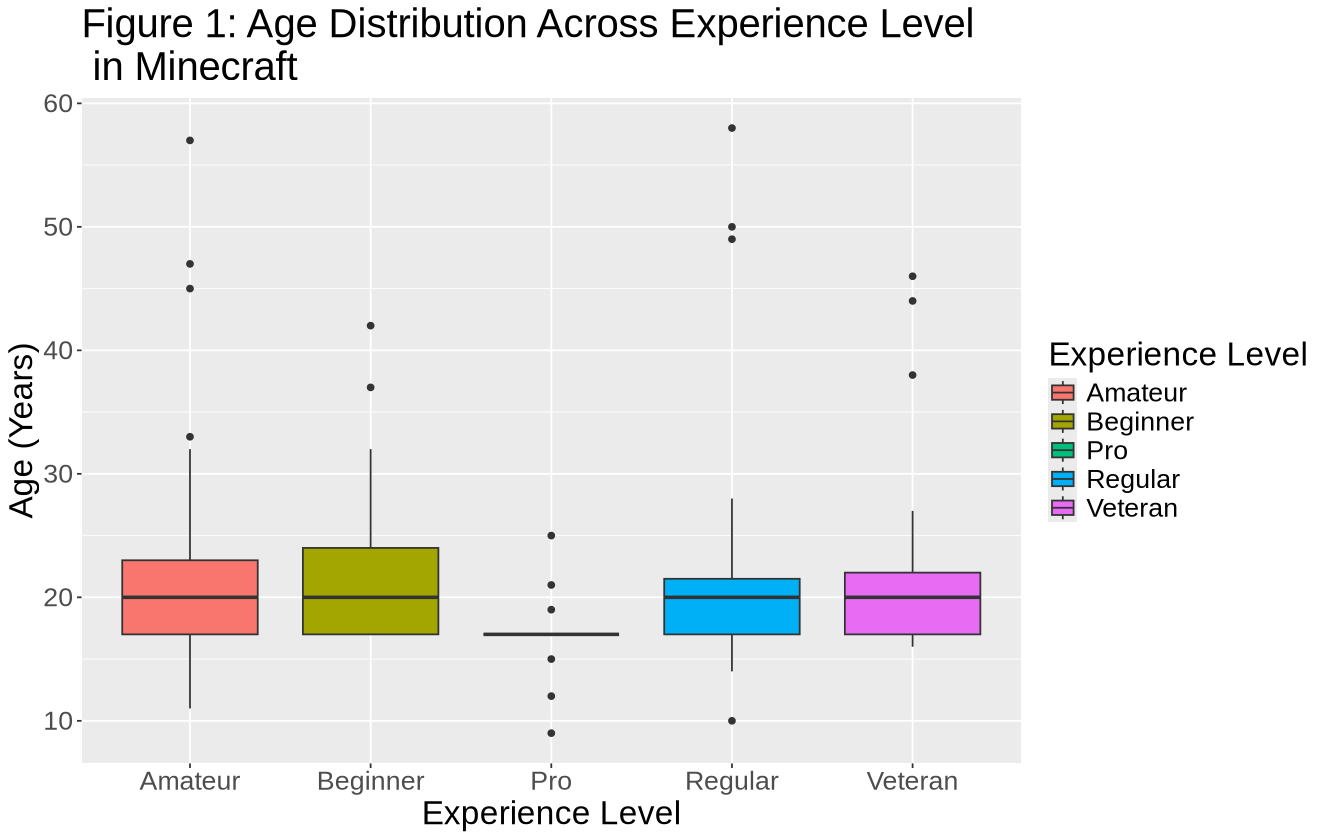

In [6]:
options(repr.plot.width = 11, repr.plot.height = 7)

age_experience_box_plot <- experience_report_data |>
    ggplot(aes(x = experience, y = Age, fill = experience)) +
    geom_boxplot() +
    labs(x = "Experience Level", y = "Age (Years)", fill = "Experience Level") +
    ggtitle("Figure 1: Age Distribution Across Experience Level \n in Minecraft") +
    theme(text = element_text(size = 20))
age_experience_box_plot

Figure 1 is a box plot, used to visualize the distribution of ages across experience levels. The box plot shows the range of ages in each experience group, the median age, and any outliers in the specific category. The experience level Pro is especially intriguing, as this small group is composed almost entirely of outliers. Therefore, there are not enough Pro observations to show a meaningful median or spread. These outliers also include the data point representing the youngest age, being age 9, in the data set. The Pro category has the youngest median, approximately 17 years old, across the categories. Furthermore, the oldest Pro is only 25, which is the youngest maximum age of any experience level. Therefore, these insights suggest that the Pro category does not provide any reliable conclusions about age. Another notable aspect of the visualization is that the common median of the other four experience groups is 20 years of age. Therefore, this graph suggests the data set consists of mostly younger players but does not point to any certain relationships. Even so, this visualization helps in understanding how age is distributed across the experience groups, giving insight into how age may influence the model's predictions.

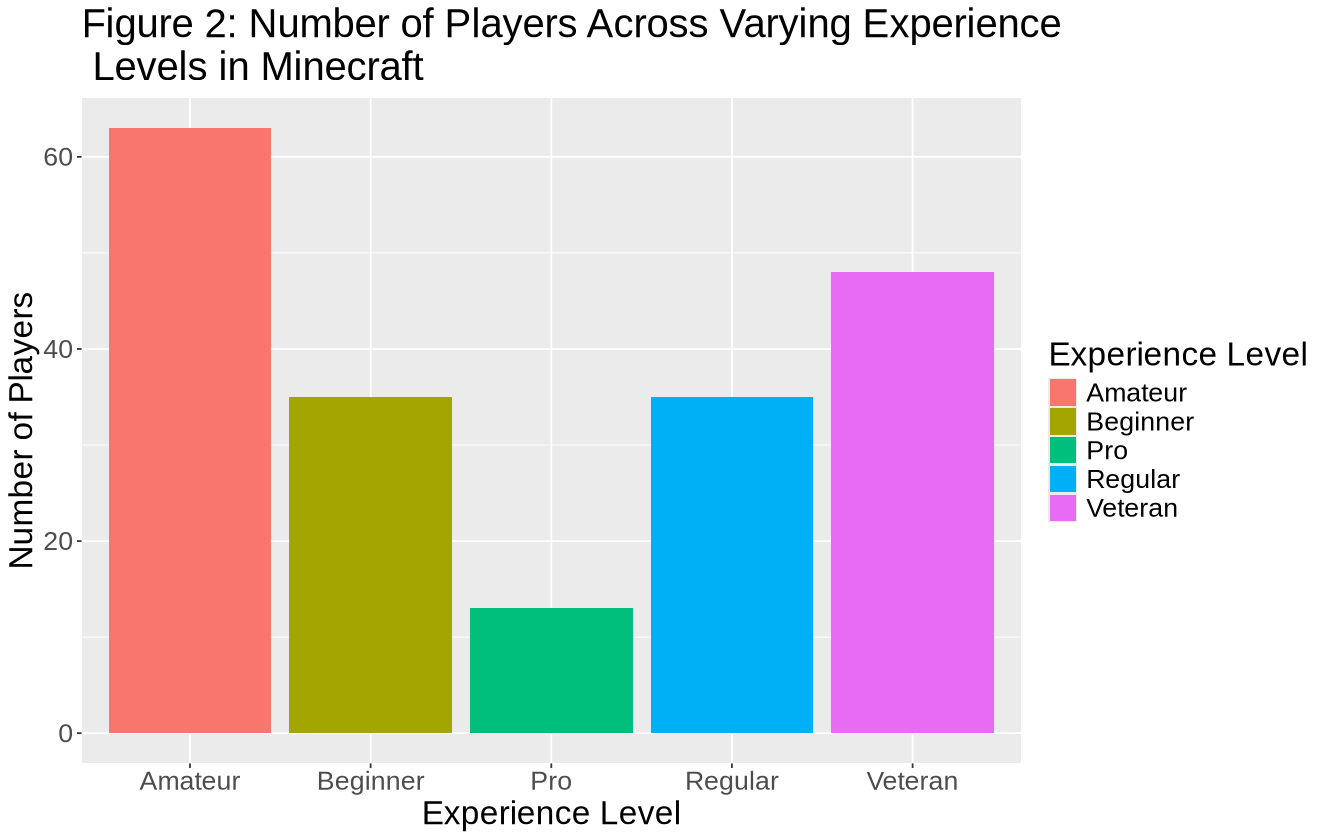

In [7]:
experience_bar_plot <- experience_report_data |>
    ggplot(aes(x = experience, fill = experience)) +
    geom_bar() +
    labs(x = "Experience Level", y = "Number of Players", fill = "Experience Level") +
    ggtitle("Figure 2: Number of Players Across Varying Experience \n Levels in Minecraft") +
    theme(text = element_text(size = 20))
experience_bar_plot

Figure 2 shows the number of players across each experience category. By ranking the categories from having the most to least amount of players, they fall in the order: Amateur, Veteran, Regular, Beginner, and Pro. The class with the most players and second most players are Amateur and Veteran respectively. This suggests that there are a fair amount of both experienced and inexperienced players participating in the data research. There are roughly the same amount of Regular and Beginner players that participated. However, the insights from this bar plot do not suggest any strong relationships in the data. Nevertheless, knowing how many players are in each experience level can help in understanding how the highly uneven distribution may introduce an underlying bias in the model's prediction results.

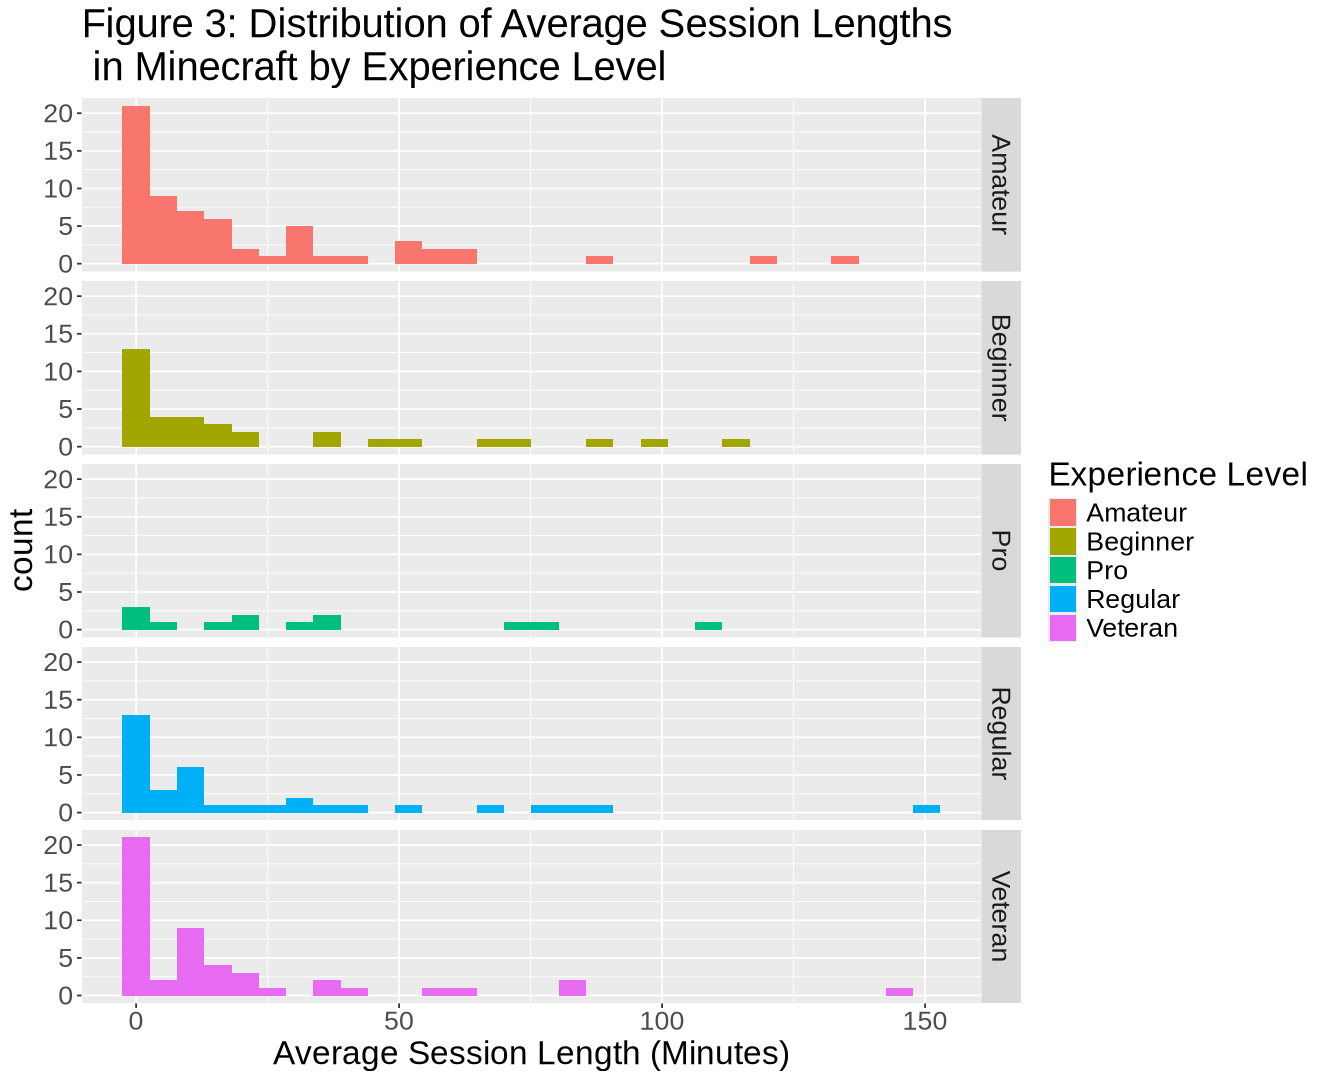

In [8]:
options(repr.plot.width = 11, repr.plot.height = 9)

exp_asl_histogram_plot <- experience_report_data |>
    ggplot(aes(x = average_session_length, fill = experience)) +
    geom_histogram(position = "identity", bins = 30) +
    facet_grid(rows = vars(experience)) +
    labs(x = "Average Session Length (Minutes)", fill = "Experience Level") +
    ggtitle("Figure 3: Distribution of Average Session Lengths \n in Minecraft by Experience Level") +
    theme(text = element_text(size = 20))
exp_asl_histogram_plot

Figure 3 shows histograms of player's average session length, each separated by experience level. As displayed, all five of the graphs are left-skewed. This implies that the majority of players have an average gaming time of under 50 minutes. Therefore, an underrepresentation of longer average gaming sessions. Furthermore, these are no strongly identifiable relationships relating to experience level amongst the graphs above. However, there are weak patterns. The distribution seen in Amateur and Beginner, which represent less experienced players, are mostly clustered between 0 to 25 minutes. On the other hand, Regular, Pro, and Veteran appear to show slightly more spread. Therefore, these weak trends could imply less experienced players tend to spend less time gaming per session compared to more experienced players. Moreover, it is important to note there are very few observations for the average session length in the Pro class. Hence, this insufficient representation, compared to classes with much larger counts like Amateur and Veteran, will likely bias the model's resulting predictions.

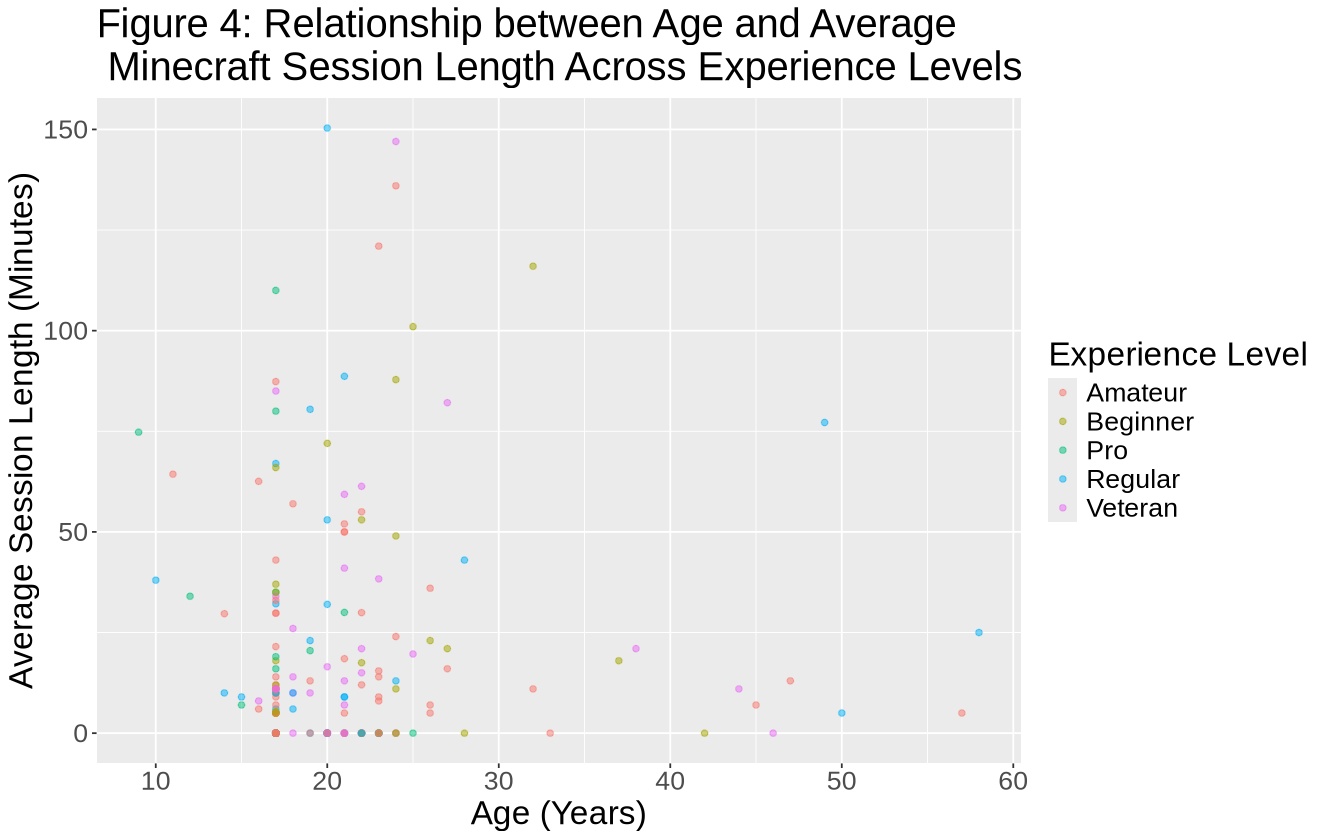

In [9]:
options(repr.plot.width = 11, repr.plot.height = 7)

asl_age_scatter_plot <- experience_report_data |>
    ggplot(aes(x = Age, y = average_session_length, color = experience)) +
    geom_point(alpha = 0.5) +
    labs(x = "Age (Years)", y = "Average Session Length (Minutes)", color = "Experience Level") +
    ggtitle("Figure 4: Relationship between Age and Average \n Minecraft Session Length Across Experience Levels") +
    theme(text = element_text(size = 20))
asl_age_scatter_plot

Figure 4 is a scatter plot that shows how age relates to average session length, with points coloured by experience level. By observing this graph, younger players below 30 years of age tend to have longer average session lengths. Yet this is a weak relationship due to the high variability and does not provide a relation to experience level. There does not appear to be any obvious class boundaries between the categories; therefore it is difficult to identify a certain relationship for experience in terms of average session length against age. Additionally, the different types of experience levels are scattered with a lack of pattern across the graph. In conclusion, no strong relationship between average session length, age, and experience level can be confidently identified.

#### Building the Best KNN Classification Model 

The following code and accompanying writing explains the process of constructing the best KNN classification model with tuning and evaluating the accuracy result of the best model's predictions. The same seed is set throughout everything because it ensures that all random processes are reproducible.

##### Step 1: Splitting the Dataset
The dataset `experience_report_data` is first split into a training set and a testing set. The proportion specified is 75/25, a commonly used ratio in this course, and it is stratified with the variable `experience`. Splitting the data into two sets is crucial in training and evaluating the accuracy of the final model in the end. This is because to obtain an accurate estimation of the model's accuracy, it needs to be tasked with predicting a data set it has not seen before, which will be the testing set.

In [10]:
set.seed(2542)

experience_split <- initial_split(experience_report_data, prop = 0.75, strata = experience)  
experience_training <- training(experience_split)   
experience_testing <- testing(experience_split)

##### Step 2: Creating the Recipe
The recipe, which is built using `experience_training`, specifies the target variable, `experience`, and predictor variables, `Age` and `average_session_length`. Furthermore, since the predictors have different raw scales, they have been standardized to prevent any predictor from dominating the distance calculations.

In [11]:
set.seed(2542)

experience_recipe <- recipe(experience ~ Age + average_session_length, data = experience_training) |>
   step_scale(Age, average_session_length) |>
   step_center(Age, average_session_length)
experience_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: Age and average_session_length

• Centering for: Age and average_session_length



##### Step 3: Creating the KNN Tuneable Model
The tuneable model specification sets the engine to "kknn" and the mode to classification to predict a categorical variable. Additionally, the training set will be further split to conduct five-fold cross-validation, a commonly used value in this course, to calculate the accuracies of different k values. Furthermore, the k values from one to 15 will be examined as its range explores both low and moderate numbers of neighbors, helping to find a balance between underfitting and overfitting. These k values have been placed into a new tibble named `k_vals`.

In [12]:
set.seed(2542)

experience_knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")

experience_vfold <- vfold_cv(experience_training, v = 5, strata = experience)

k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

##### Step 4: Tuning the Model with Cross Validation
The recipe and model are combined in a workflow to conduct the five-fold cross-validation. Afterwards, the metrics are collected into `knn_results` and further filtered to yield `k_accuracies`, a dataframe containing the estimated accuracies of the k values tested.

In [13]:
set.seed(2542)

knn_results <- workflow() |>
  add_recipe(experience_recipe) |>
  add_model(experience_knn_tune) |>  
  tune_grid(resamples = experience_vfold, grid = k_vals) |>
  collect_metrics()

k_accuracies <- knn_results |> 
    filter(.metric == "accuracy")

##### Step 5: Accuracies vs. K Plot to Select the Best K Value
The dataframe `k_accuraries` plots a scatter plot, in which the points are connected with a line, that details the trend of accuracy estimates across different k values. However, there appears to be a lack of pattern and unpredictability beyond k = 15, as seen in Figure 5 below. Nevertheless, the largest accuracy estimate does evidently appear at k = 4 as a large spike on the visualization. Therefore, the k value of 4 will be used to construct the best model, which theoretically should yield the highest accuracy in predictions.

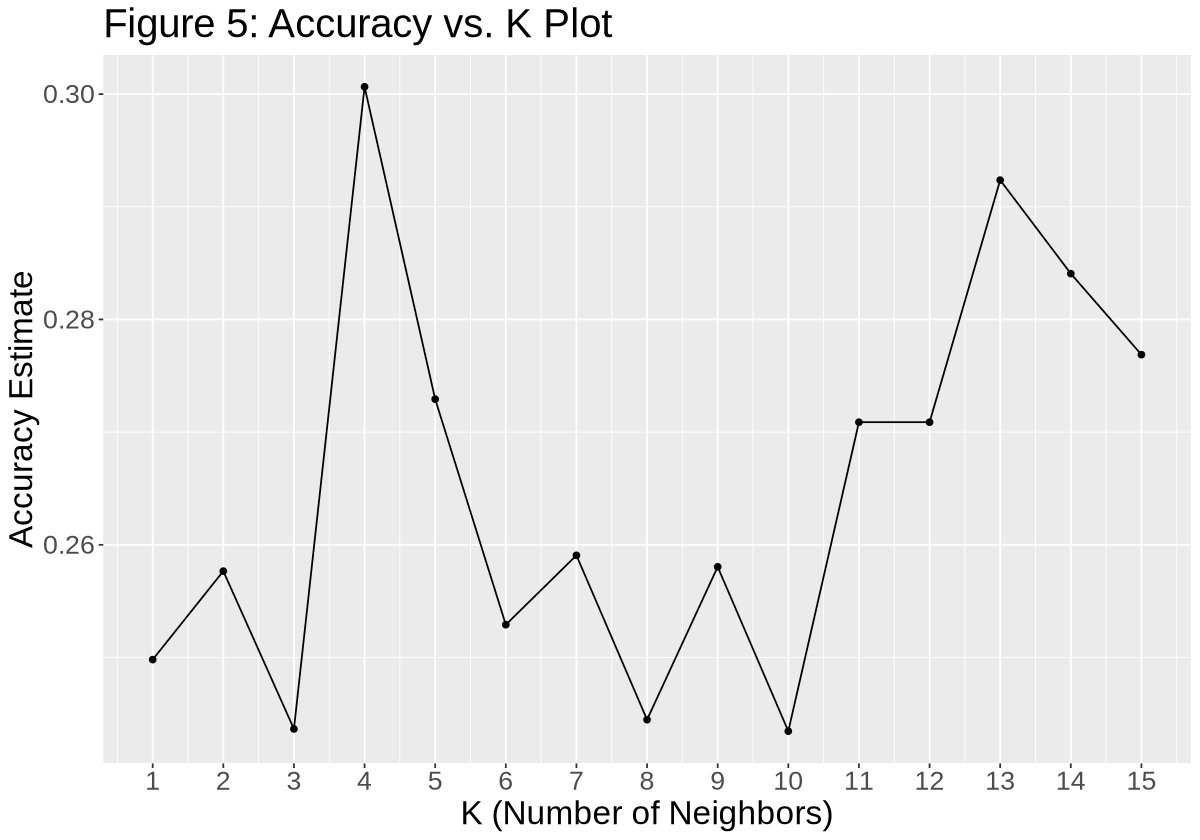

In [14]:
set.seed(2542)
options(repr.plot.height = 7, repr.plot.width = 10)

cross_val_plot <- k_accuracies |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "K (Number of Neighbors)", y = "Accuracy Estimate") +
    scale_x_continuous(breaks = seq(0, 15, by = 1)) +
    ggtitle("Figure 5: Accuracy vs. K Plot") +
    theme(text = element_text(size = 20))
cross_val_plot

##### Step 6: Creating the Final Workflow with the Best Model
The final workflow combines `experience_recipe`, `experience_best_spec`, which is the best model with k = 4, and is fitted to `experience_training`. This workflow, `experience_fit`, will be applied to `experience_testing`, a proportion of the original tidy data that it has yet to see, to be evaluated for accuracy. 

In [15]:
set.seed(2542)

experience_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
                set_engine("kknn") |>
                set_mode("classification")

experience_fit <- workflow() |>
                add_recipe(experience_recipe) |>
                add_model(experience_best_spec) |>
                fit(data = experience_training) 
experience_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(4,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.6666667
Best kernel: rectangular
Best k: 4

#### Evaluating the Best KNN Classification Model with K = 4

##### Accuracy and Confusion Matrix

The reported estimated accuracy of the best KNN classification model's predictions for the testing data is 26%. This accuracy is very low, reflecting that the model is only correct 26% of the time. 

Furthermore, the generated confusion matrix indicates the summary of all the model's predicted values compared with the actual values. Therefore, it allows for a more detailed evaluation of where the model encounters difficulties. The diagonal values, from the top left to the bottom right, represent the correct predictions. These values are low overall, with 7 correct predictions for Amateur being comparatively higher than the rest. Furthermore, the model tends to predict the Amateur class more often than any other. These insights suggest a bias in predicting Amateur, which is likely due to the domination of the Amateur class in the training data. As a result, the model is most familiar with the Amateur class, and many data points end up being closest, Euclidean distance wise, to Amateur observations. Furthermore, the model struggles most with predicting the Pro class correctly as 0 correct Pro predictions were made. This limitation is likely caused by a highly inadequate amount of Pro observations in the training data, compared to the other classes. These very few Pro observations are likely spread out amongst the data without clear clustering patterns or a class boundary. Therefore, the model cannot reasonably predict any observations from the testing data as Pro.

In [16]:
set.seed(2542)

experience_predictions <- predict(experience_fit, new_data = experience_testing) |>
    bind_cols(experience_testing)
experience_metrics_accuracy <- experience_predictions |>
    metrics(truth = experience, estimate = .pred_class) |>
    filter(.metric == "accuracy")
experience_metrics_accuracy


experience_conf_mat <- conf_mat(experience_predictions, truth = experience, estimate = .pred_class)
experience_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.26


          Truth
Prediction Amateur Beginner Pro Regular Veteran
  Amateur        7        4   3       2       8
  Beginner       3        1   1       2       1
  Pro            1        0   0       0       0
  Regular        3        1   0       2       1
  Veteran        2        3   1       1       3

##### Precision and Recall

The reported estimated precision is 23%, and the reported estimated recall is 26%. These results suggest that the model struggles to correctly assign labels, which corresponds to low precision, and find the true labels, reflecting low recall. Therefore, these values and implications suggest that the model struggles with most aspects overall.

In [17]:
experience_metrics_precision <- precision(experience_predictions,
    truth = experience,
    estimate = .pred_class,
    estimator = "macro_weighted")
experience_metrics_precision

experience_metrics_recall <- recall(experience_predictions,
    truth = experience,
    estimate = .pred_class,
    estimator = "macro_weighted")
experience_metrics_recall

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,macro_weighted,0.2338333


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,macro_weighted,0.26


#### Evaluating the Best Model's Predictions through Visualization

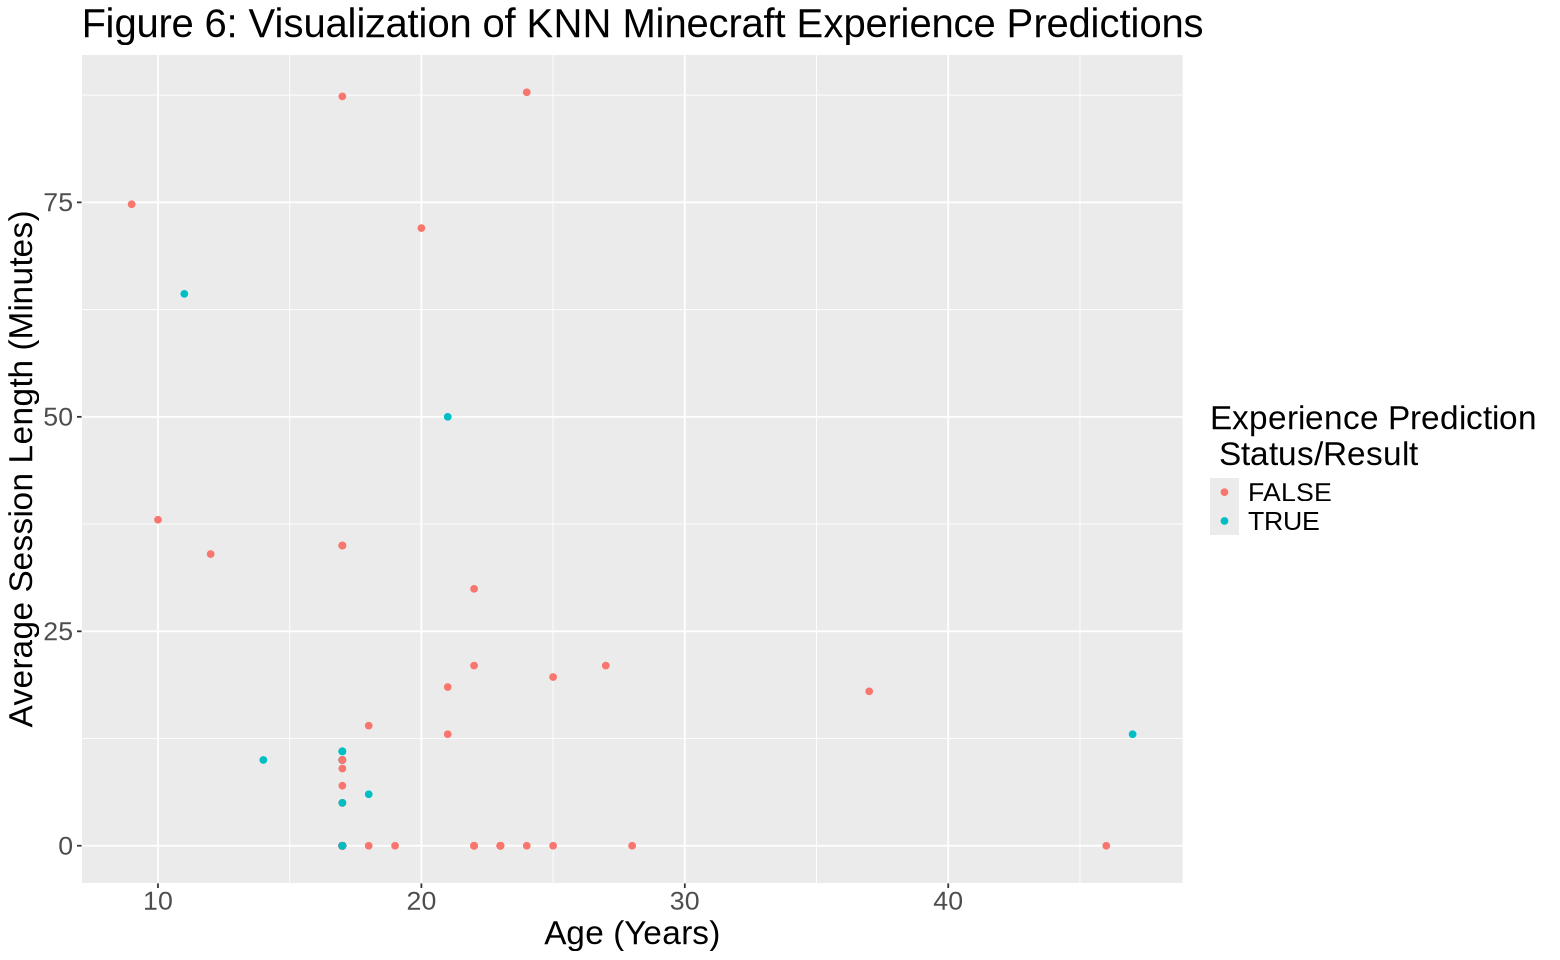

In [18]:
options(repr.plot.width = 13, repr.plot.height = 8)

experience_predictions_checked <- experience_predictions |>
  mutate(correct = .pred_class == experience)

prediction_results_plot <- experience_predictions_checked |>
    ggplot(aes(x = Age, y = average_session_length, color = correct)) +
    geom_point() +
    labs(x = "Age (Years)", y = "Average Session Length (Minutes)", color = "Experience Prediction \n Status/Result") +
    ggtitle("Figure 6: Visualization of KNN Minecraft Experience Predictions") +
    theme(text = element_text(size = 20))
prediction_results_plot

Figure 6 displays a scatter plot of all the predictions generated by the best KNN classification model on the testing data. In addition, the colour of the data points indicate whether or not the experience prediction made is accurate. From the graph, it appears that TRUE or correct predictions are incredibly sparse compared to the FALSE or incorrect predictions. Thus, the model frequently makes predictions that turn out to be FALSE. It also seems that both the correct and incorrect predictions are scattered across the graph with a lack of pattern or any identifiable relationships. Therefore, Figure 6 helps in reinforcing that the best KNN classification model created does not perform well in reality.

### Part 3: Discussion

#### Summarize what you found
Using the best K value found from the Accuracy vs K plot, k = 4, the model was able to predict the classes of `experience_testing` with an accuracy of 26%. Looking at the confusion matrix, Amateur was predicted 24 times, Veteran 10 times, Beginner 8 times, Regular 7 times, and Pro was not predicted a single time. Every category was predicted correctly less than half the time. Amateur predictions were the most accurate because this category was predicted far more often than the others and the largest class in `experience_training`. Because the Pro category had far less data than the others, it was practically ignored during the prediction process. Thus, there were no Pro predictions made. The precision and accuracy of the model was 23% and 26% respectively, suggesting that the model exhibits poor performance overall. Furthermore, the Accuracy vs K plot used to determine the best K is very abnormal as it fluctuates very often; it is dropping and rising repeatedly instead of hitting a clear peak and then leveling off. The highest point occurs at k = 4; however, there are still rising patterns that continue after it. From these results one can conclude that `Age` and `average_session_length` lack a strong relationship with `experience`. Additionally, when experimenting with the `set.seed` function, created to ensure reproducibility, the Accuracy vs K plots generated from different seed values showed drastically different plots. This suggests that the selected algorithm is highly sensitive to the initialization, further implying that the KNN classification algorithm may not be well-suited for predicting the data in practice.

#### Discuss whether this is what you expected to find
The low accuracy of 26% was not unexpected as the scatter plot shown in Figure 4 revealed no clear class boundaries between the `experience` categories. Additionally, Figure 4 shows that `Age` and `average_session_length` contain points showing no clear patterns across classes, making accurate predictions very difficult. In theory, using two numeric variables, `Age` and `average_session_length`, to predict a categorical variable, `experience`, using KNN classification would be a good approach; however the nature of the variables themselves resulted in difficulties. They were impractical to use as they displayed no class boundaries and are biased in representation. The data used contains sampling bias that cannot be fixed with upsampling in R as the representation within variables is skewed. `Age` is heavily skewed towards the younger population and `average_session_length` is skewed towards shorter average play times. Additionally the `experience` variable is also imbalanced as there are more Amateur observations than any other `experience` categories and far less Pro observations. Therefore, this can explain why some of these categories are overrepresented and underrepresented in the predictions.

#### Discuss what impact could such finding have
Through this analysis, it can be concluded that gaming experience is not something that can be judged by `Age` and `average_session_length`. This is likely because `experience` is a subjective self-reported value, meaning that players can determine their `experience` level solely on how skilled they believe themselves to be. Thus, assuming that `experience` is self-reported, it is not based on any objective measurement. Therefore it can be quite unreliable and challenging to predict with objective factors. Hence, it can be inferred that KNN classification and similar approaches are generally not very effective at predicting a subjective variable using objective variables.

#### Discuss what future questions could this lead to
A primary issue when looking at this dataset is the subjectivity of the variable `experience`. This subjectivity created an abundance of uncertainty in variable relationships, which severely disrupted the performance of the KNN classification model. This raises the question of whether a new predictive or grouping technique such as `clustering` would be a better fit for the data. While the idea of clustering seems fair due to the many levels of `experience` and can provide better insight into other types of grouping, it does not answer our question of interest. Therefore, it is worth questioning how `experience` could be quantified objectively, to decrease the classifying issues faced in this analysis.